In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

In [3]:
from scipy.optimize import curve_fit
from copy import copy, deepcopy
def rcs_fit_fun_depth1(x, alpha):
        #return a * np.exp(-alpha * x)
        return alpha ** x

def fit_EAB_depth1(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun_depth1, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1])
        alpha = params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[0]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0


    return alpha, alpha_err

    print(alpha, alpha_err)

def int_to_pauli(i,n):
    p = np.base_repr(i,base=4)
    p = '0'*(n-len(p)) + p
    p = p.replace('0','I').replace('1', 'X').replace('2', 'Y').replace('3', 'Z')
    return p

def commute(p,q):
    c = 1
    n = len(p)
    for i in range(n):
        if p[i] != 'I' and q[i] != 'I':
            if p[i] != q[i]:
                c *= -1
    return c

def fidelity_to_error(pauli_fidelity,n):
    N = 4**n
    pauli_error = {}
    for i in range(N):
        p = int_to_pauli(i,n)
        pauli_error[p] = 0
        for j in range(N):
            q = int_to_pauli(j,n)
            pauli_error[p] += pauli_fidelity[q] * commute(p,q) / N
    return pauli_error
    

In [4]:
import random   
def rcs_fit_fun(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a * (alpha ** x)

def fit_EAB_plot(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)



In [5]:
# filename = str(uuid.uuid4())
# filename+="XX23541_noSE_explicitCNOT_XX_R_0711_01+10_ExperimentalData"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/EAB_identity_channel/results_file/6e9b3d83-c000-409b-9731-7d059c29bdd4XX23541_FTXX_identitychannel_01152024_01+10_ExperimentalData", "rb") as fp:
    eab_load_cpy=pickle.load(fp)

In [6]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
shots=2000
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB_01_identitytest(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

print (eab_result)


{'fidelity_list': {'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.833, 0.94, 0.926, 0.883, 0.82, 0.925, 0.799, 0.822, 0.794, 0.641, 0.809, 0.829, 0.709, 0.809, 0.879, 0.903, 0.69, 0.827, 0.923, 0.915], 4: [0.811, 0.873, 0.791, 0.781, 0.897, 0.931, 0.773, 0.785, 0.681, 0.779, 0.673, 0.911, 0.787, 0.727, 0.881, 0.85, 0.866, 0.744, 0.86, 0.861], 8: [0.726, 0.67, 0.765, 0.632, 0.631, 0.646, 0.745, 0.75, 0.664, 0.729, 0.799, 0.788, 0.652, 0.8, 0.747, 0.705, 0.865, 0.712, 0.849, 0.681], 16: [0.396, 0

Data analysis: no bootstrapping, different depth

Analyze full set of data without bootstrapping

Parameters: n = 2, C = 20,  L =  [2, 4, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.020775356682823598
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0197238 0.0019712
YI 0.0177217 0.0015327
ZI 0.0079675 0.0008611
IX 0.0189753 0.0014404
XX 0.0363888 0.0022507
YX 0.0354962 0.0021225
ZX 0.0257269 0.0015447
IY 0.0186966 0.0014041
XY 0.0362712 0.0022173
YY 0.035517 0.002019
ZY 0.0253372 0.0014838
IZ 0.0027731 0.0003529
XZ 0.0219661 0.0020556
YZ 0.0201394 0.0016272
ZZ 0.0097049 0.0009465


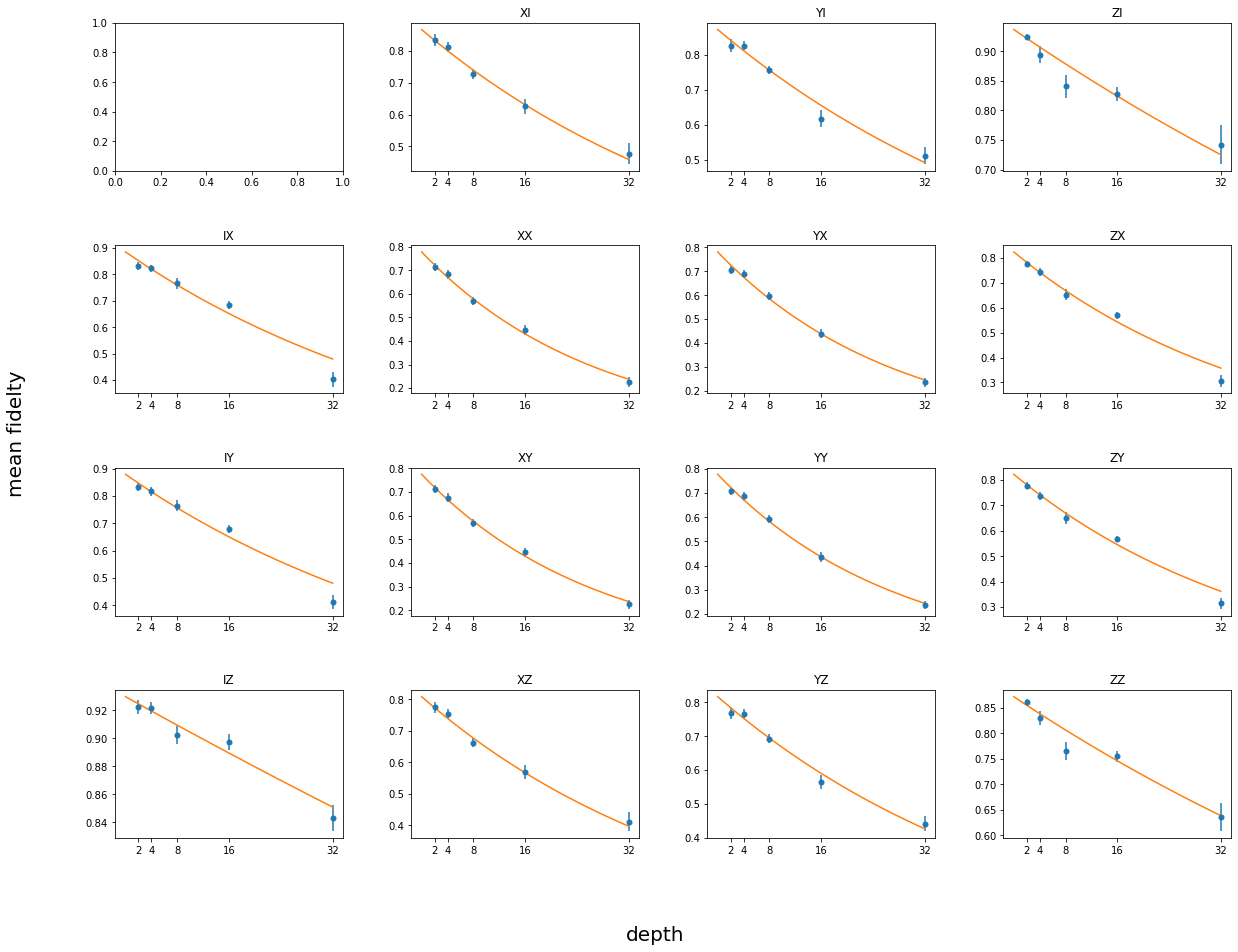

In [7]:
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
# depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
# shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

In [8]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9792246
XI 0.001426
YI 0.0021104
ZI 0.0071277
IX 0.0005253
XX 5.2e-05
YX 9.13e-05
ZX -4.51e-05
IY 0.000621
XY 5.55e-05
YY 6.01e-05
ZY 2.64e-05
IZ 0.0082758
XZ -4.22e-05
YZ 0.0002306
ZZ 0.0002605


scatter plot: result from each circuit

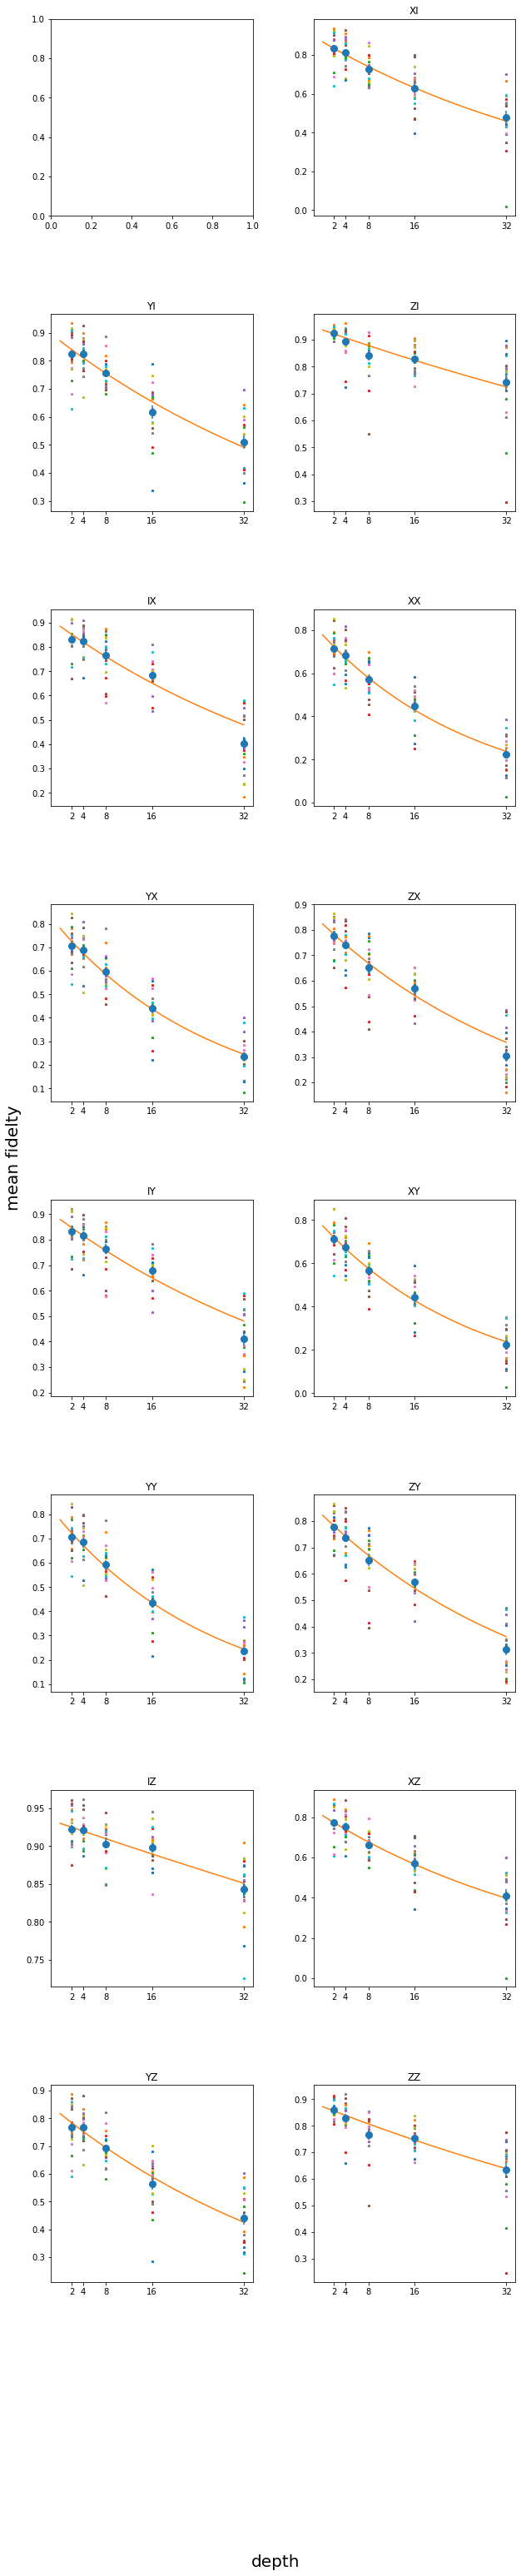

In [9]:
x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(8, 2)
fig.set_figwidth(10)
fig.set_figheight(50)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (8):
    for j in range(2):
        pauli_label=pauli_request_list[2*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
#             print ([tuple(eab_result['fidelity_list'][pauli_label][2])])
            axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=8)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

# data analysis with bootstrapping

full set of data with bootstrapping

In [10]:
import bootstrap

raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
# depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
alpha_detail={}
a_detail={}
alpha_error_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        fidelity_list[pauli_label] = alpha_bootstrap #avg pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err_bootstrap #error on pauli fidelity from fit
        a_BS_dic[pauli_label]=a_rtn_frm_fit
        Y_BS_dic[pauli_label]=Y_rtn_frm_fit
        Yerr_BS_dic[pauli_label]=Yerr_rtn_frm_fit 
        alpha_detail[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit


# pauli_label="IX"
# print (Y_BS_dic["IX"][0])    
# print (Yerr_BS_dic["IX"][0])  
# print (a_BS_dic["IX"][0])
# print (alpha_detail[pauli_label][0])


Method I: use the average of the 10 sets of Pauli fidelities from 10 times of resampling in bootstrapping


XI 0.020028 0.0017031
YI 0.0174606 0.0010282
ZI 0.0081132 0.0004628
IX 0.0184484 0.0010433
XX 0.0368769 0.0007506
YX 0.0351323 0.0013291
ZX 0.0251264 0.0006868
IY 0.0191337 0.0007567
XY 0.0359525 0.0017725
YY 0.0351487 0.001317
ZY 0.0251404 0.0009252
IZ 0.0026897 0.0001717
XZ 0.021889 0.0014562
YZ 0.0203816 0.0009058
ZZ 0.0091723 0.0008595
{'IX': [0.9798081021187317, 0.9769907047588072, 0.9797812423048027, 0.9783517813563082, 0.9787652226839328, 0.9805431592829007, 0.9821863420870308, 0.9828317338778547, 0.9791281198328797, 0.9813334816633404], 'IY': [0.9814475405088843, 0.9823802875492298, 0.9815258338465916, 0.9825073285946611, 0.9832973344885466, 0.9831697812308159, 0.9847867629221034, 0.9831514413644021, 0.9816740292473594, 0.9814533029114346], 'IZ': [0.9908586012383843, 0.9926273975469274, 0.9916732316278609, 0.9915935673553133, 0.9921785024401063, 0.9924089708830245, 0.9919262499865428, 0.9918008262787346, 0.9917641043698702, 0.9920367568591609], 'XI': [0.9803298558278792, 0.9828

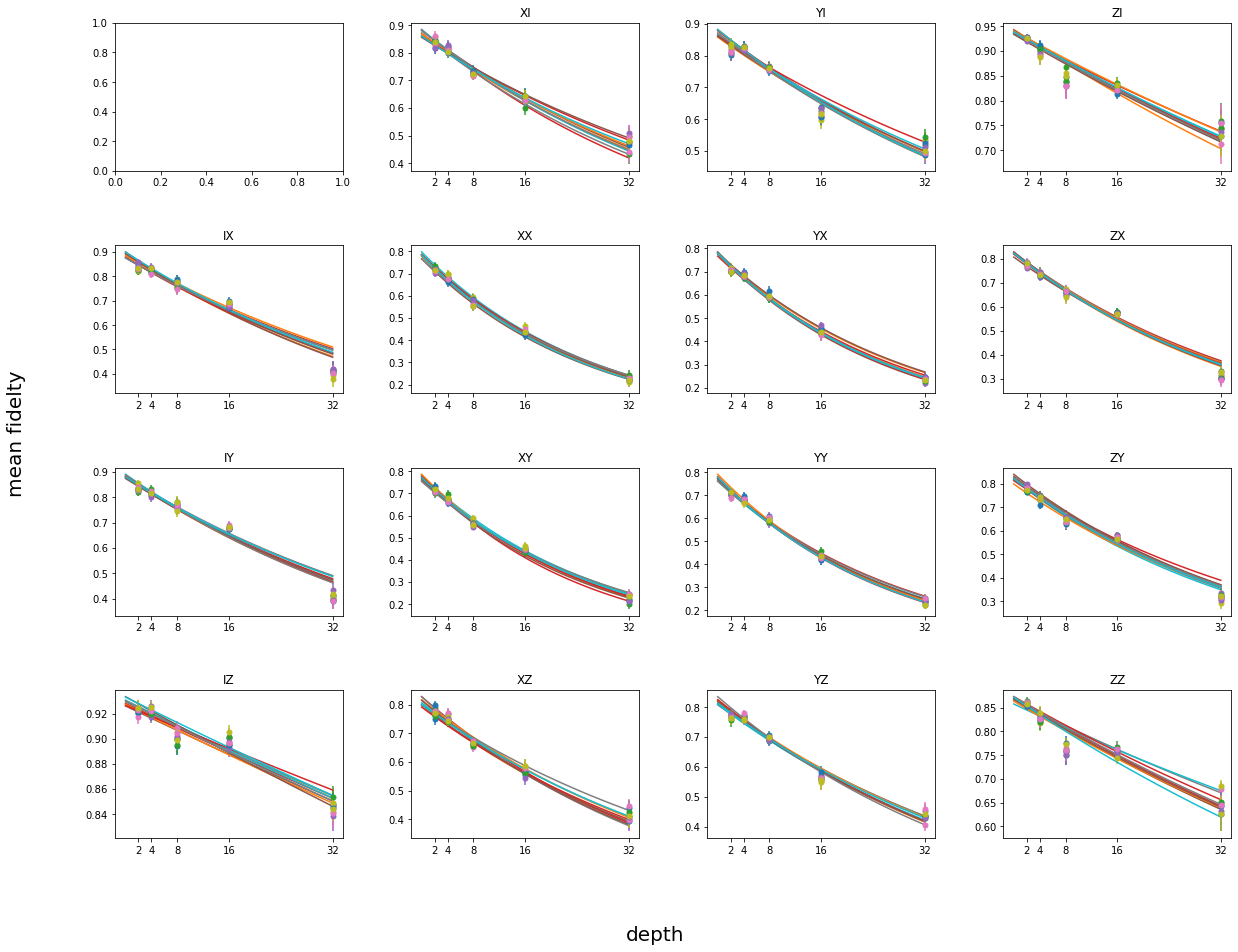

In [11]:
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        continue
    else:
        print (pauli_label[::-1],round(1-fidelity_list[pauli_label],7),round(stdev_list[pauli_label],7))


x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
            for m in range (10):
                axs[i, j].errorbar(depth,Y_BS_dic[pauli_label][m], yerr=Yerr_BS_dic[pauli_label][m], fmt='o',markersize=5)
                axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_BS_dic[pauli_label][m], alpha_detail[pauli_label][m]))
            axs[i, j].set_title(pauli_label[::-1])

print (alpha_detail)    

Method II: use the average of the 10 sets of Y from resampling as the a new set of Y and do the fit once with the new Y


In [12]:
raw_fidelity_list_avg={}
for pauli_label in pauli_request_list:
    raw_fidelity_list_avg[pauli_label]={}
    raw_fidelity_list_avg[pauli_label][2]=[]
    raw_fidelity_list_avg[pauli_label][4]=[]
    raw_fidelity_list_avg[pauli_label][8]=[]
#     raw_fidelity_list_avg[pauli_label][16]=[]
#     raw_fidelity_list_avg[pauli_label][32]=[]
    if (pauli_label=="II"):
        raw_fidelity_list_avg[pauli_label][2]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][4]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][8]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][16]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][32]=[1.0]*10
    else:
        for i in range (10):
            raw_fidelity_list_avg[pauli_label][2].append(Y_BS_dic[pauli_label][i][0])
            raw_fidelity_list_avg[pauli_label][4].append(Y_BS_dic[pauli_label][i][1])
            raw_fidelity_list_avg[pauli_label][8].append(Y_BS_dic[pauli_label][i][2])
#             raw_fidelity_list_avg[pauli_label][16].append(Y_BS_dic[pauli_label][i][3])
#             raw_fidelity_list_avg[pauli_label][32].append(Y_BS_dic[pauli_label][i][4])


raw_fidelity_list = raw_fidelity_list_avg
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)  

KeyError: 16

In [ ]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


# Bootstrapping for different number of layers
Obtain the lists of:  
    alpha_detail[pauli_label]=alpha_rtn_frm_fit
    alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit
for different number of layers

plot alpha_detail vs. number of layers

In [21]:
# #####dpth=[2,4]
# raw_fidelity_list = eab_result["fidelity_list"]
# depth=[2,4]
# fidelity_list = {}
# stdev_list = {}
# a_detail={}
# Y_detail={}
# Y_err_detail={}
# a_BS_dic={}
# Y_BS_dic={}
# Yerr_BS_dic={}

# alpha_detail_d2={}
# alpha_error_detail_d2={}

# for pauli_label in pauli_request_list:
#     if(pauli_label == 'I'*nqubit):
#         alpha_detail_d2[pauli_label] = [1.0]*10
#         alpha_error_detail_d2[pauli_label] = [0.0]*10
#     else:
#         alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
#         alpha_detail_d2[pauli_label]=alpha_rtn_frm_fit
#         alpha_error_detail_d2[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_d2)



#####dpth=[2,8]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d2={}
alpha_error_detail_d2={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d2[pauli_label] = [1.0]*10
        alpha_error_detail_d2[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d2[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d2[pauli_label]=alpha_err_rtn_frm_fit
print (alpha_detail_d2)

# #####dpth=[8,32]
# raw_fidelity_list = eab_result["fidelity_list"]
# depth=[8,32]
# fidelity_list = {}
# stdev_list = {}
# a_detail={}
# Y_detail={}
# Y_err_detail={}
# a_BS_dic={}
# Y_BS_dic={}
# Yerr_BS_dic={}

# alpha_detail_d2_2={}
# alpha_error_detail_d2_2={}

# for pauli_label in pauli_request_list:
#     if(pauli_label == 'I'*nqubit):
#         alpha_detail_d2_2[pauli_label] = [1.0]*10
#         alpha_error_detail_d2_2[pauli_label] = [0.0]*10
#     else:
#         alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
#         alpha_detail_d2_2[pauli_label]=alpha_rtn_frm_fit
#         alpha_error_detail_d2_2[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_d2)

# ####dpth=[2,4,8]
# raw_fidelity_list = eab_result["fidelity_list"]
# depth=[2,4,8]
# fidelity_list = {}
# stdev_list = {}
# a_detail={}
# Y_detail={}
# Y_err_detail={}
# a_BS_dic={}
# Y_BS_dic={}
# Yerr_BS_dic={}

# alpha_detail_d3={}
# alpha_error_detail_d3={}

# for pauli_label in pauli_request_list:
#     if(pauli_label == 'I'*nqubit):
#         alpha_detail_d3[pauli_label] = [1.0]*10
#         alpha_error_detail_d3[pauli_label] = [0.0]*10
#     else:
#         alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
#         alpha_detail_d3[pauli_label]=alpha_rtn_frm_fit
#         alpha_error_detail_d3[pauli_label]=alpha_err_rtn_frm_fit
# # print (alpha_detail_2)

#####dpth=[2,8,32]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8,32]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d3={}
alpha_error_detail_d3={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d3[pauli_label] = [1.0]*10
        alpha_error_detail_d3[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d3[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d3[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_2)

# ####dpth=[2,4,8,16]
# raw_fidelity_list = eab_result["fidelity_list"]
# depth=[2,4,8,16]
# fidelity_list = {}
# stdev_list = {}
# a_detail={}
# Y_detail={}
# Y_err_detail={}
# a_BS_dic={}
# Y_BS_dic={}
# Yerr_BS_dic={}

# alpha_detail_d4={}
# alpha_error_detail_d4={}

# for pauli_label in pauli_request_list:
#     if(pauli_label == 'I'*nqubit):
#         alpha_detail_d4[pauli_label] = [1.0]*10
#         alpha_error_detail_d4[pauli_label] = [0.0]*10
#     else:
#         alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
#         alpha_detail_d4[pauli_label]=alpha_rtn_frm_fit
#         alpha_error_detail_d4[pauli_label]=alpha_err_rtn_frm_fit
# # # print (alpha_detail_2)

# ####depth=[2,4,8,16,32]
# alpha_detail_d5={}
# alpha_error_detail_d5={}
# alpha_detail_d5= alpha_detail
# alpha_error_detail_d5=alpha_error_detail
# alpha_detail_d5["II"] = [1.0]*10
# alpha_error_detail_d5["II"] = [0.0]*10

{'II': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'IX': [0.9790012101965188, 0.9752290829051572, 0.9825711899966079, 0.9810957689319999, 0.9774744448681766, 0.9741409529908689, 0.976433996759463, 0.9727699833526565, 0.9786369589887295, 0.9749764241743687], 'IY': [0.9765419950432154, 0.9827076387682298, 0.9823811881722792, 0.9851351865657133, 0.9851109151856083, 0.9873991926397909, 0.9847745029993408, 0.9909972684121882, 0.983032966572823, 0.9890235545588957], 'IZ': [0.982378880757181, 0.9837422838901319, 0.988623655282015, 0.9853835880546167, 0.9863242191107521, 0.983827956071416, 0.9887054231122513, 0.9850084614146847, 0.9872650150170311, 0.9839597392960324], 'XI': [0.9873629663865159, 0.9869321716714091, 0.9880303595988146, 0.987898915341027, 0.9863539713932109, 0.984519552331084, 0.9860873885677676, 0.9823660895415129, 0.9867470353322279, 0.9887909207232125], 'XX': [0.9599397337349657, 0.9608022199774457, 0.9562604501173565, 0.9709065047699871, 0.9679836038238964, 0.9632132

In [18]:
CB_alpha_detail_d28={}
CB_alpha_detail_d2832={}
CB_alpha_detail_d832={}
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_alpha_detail_d2", "rb") as fp:   # Unpickling
    CB_alpha_detail_d28 = pickle.load(fp)
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_alpha_detail_d3", "rb") as fp:   # Unpickling
    CB_alpha_detail_d2832 = pickle.load(fp)
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_alpha_detail_d4", "rb") as fp:   # Unpickling
    CB_alpha_detail_d832 = pickle.load(fp)

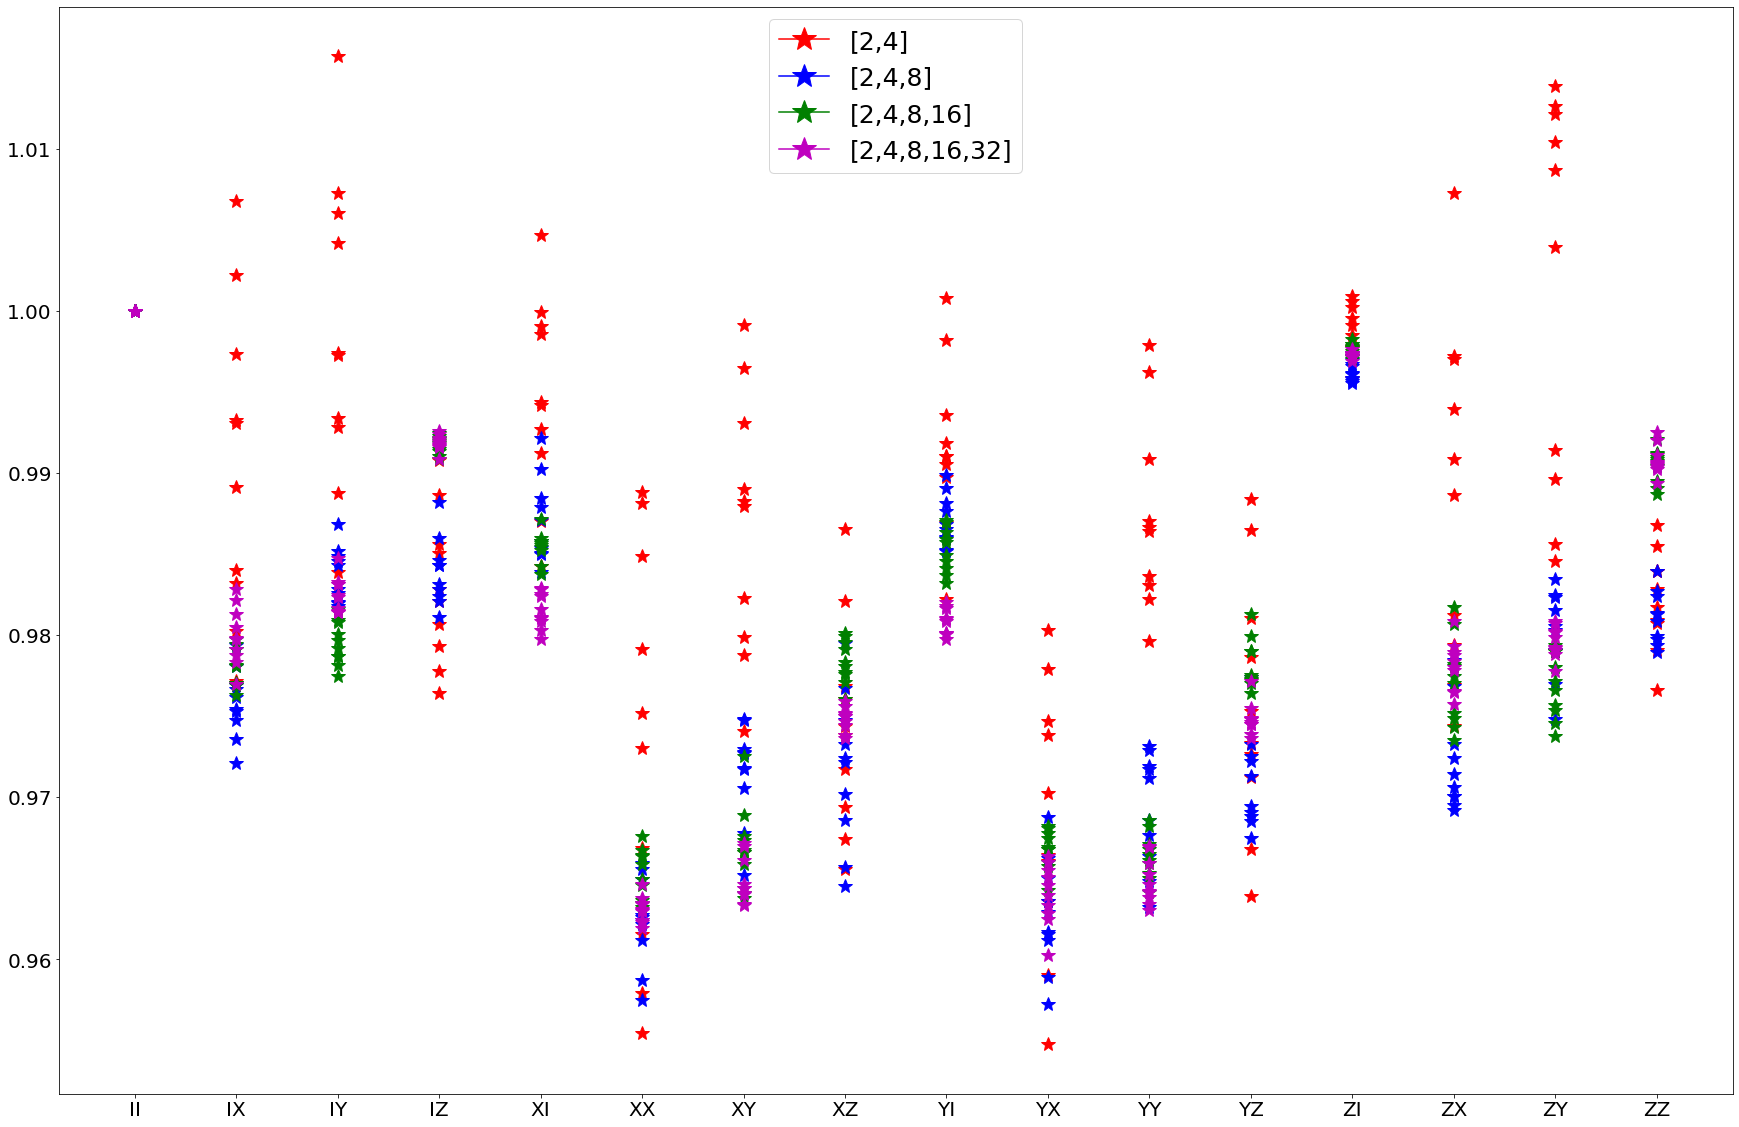

In [19]:
##plot  alpha_detail vs. depth
import seaborn as sns
pal = sns.color_palette("PRGn",20)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# fig, axs = plt.subplots(4, 4)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')
plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')
legend_elements = [Line2D([0], [0], marker='*', color='r', label='[2,4]',markerfacecolor='r', markersize=25),
                   Line2D([0], [0], marker='*', color='b', label='[2,4,8]',markerfacecolor='b', markersize=25),
                   Line2D([0], [0], marker='*', color='g', label='[2,4,8,16]',markerfacecolor='g', markersize=25),
                   Line2D([0], [0], marker='*', color='m', label='[2,4,8,16,32]',markerfacecolor='m', markersize=25),
                  ]

# plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 2')
# plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 3')
# # plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

# plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

plt.legend(handles=legend_elements, loc='upper center',fontsize=25)
# plt.legend()
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)  

# plt.figure(figsize=(30,20))
#  plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 2')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')
# plt.legend()

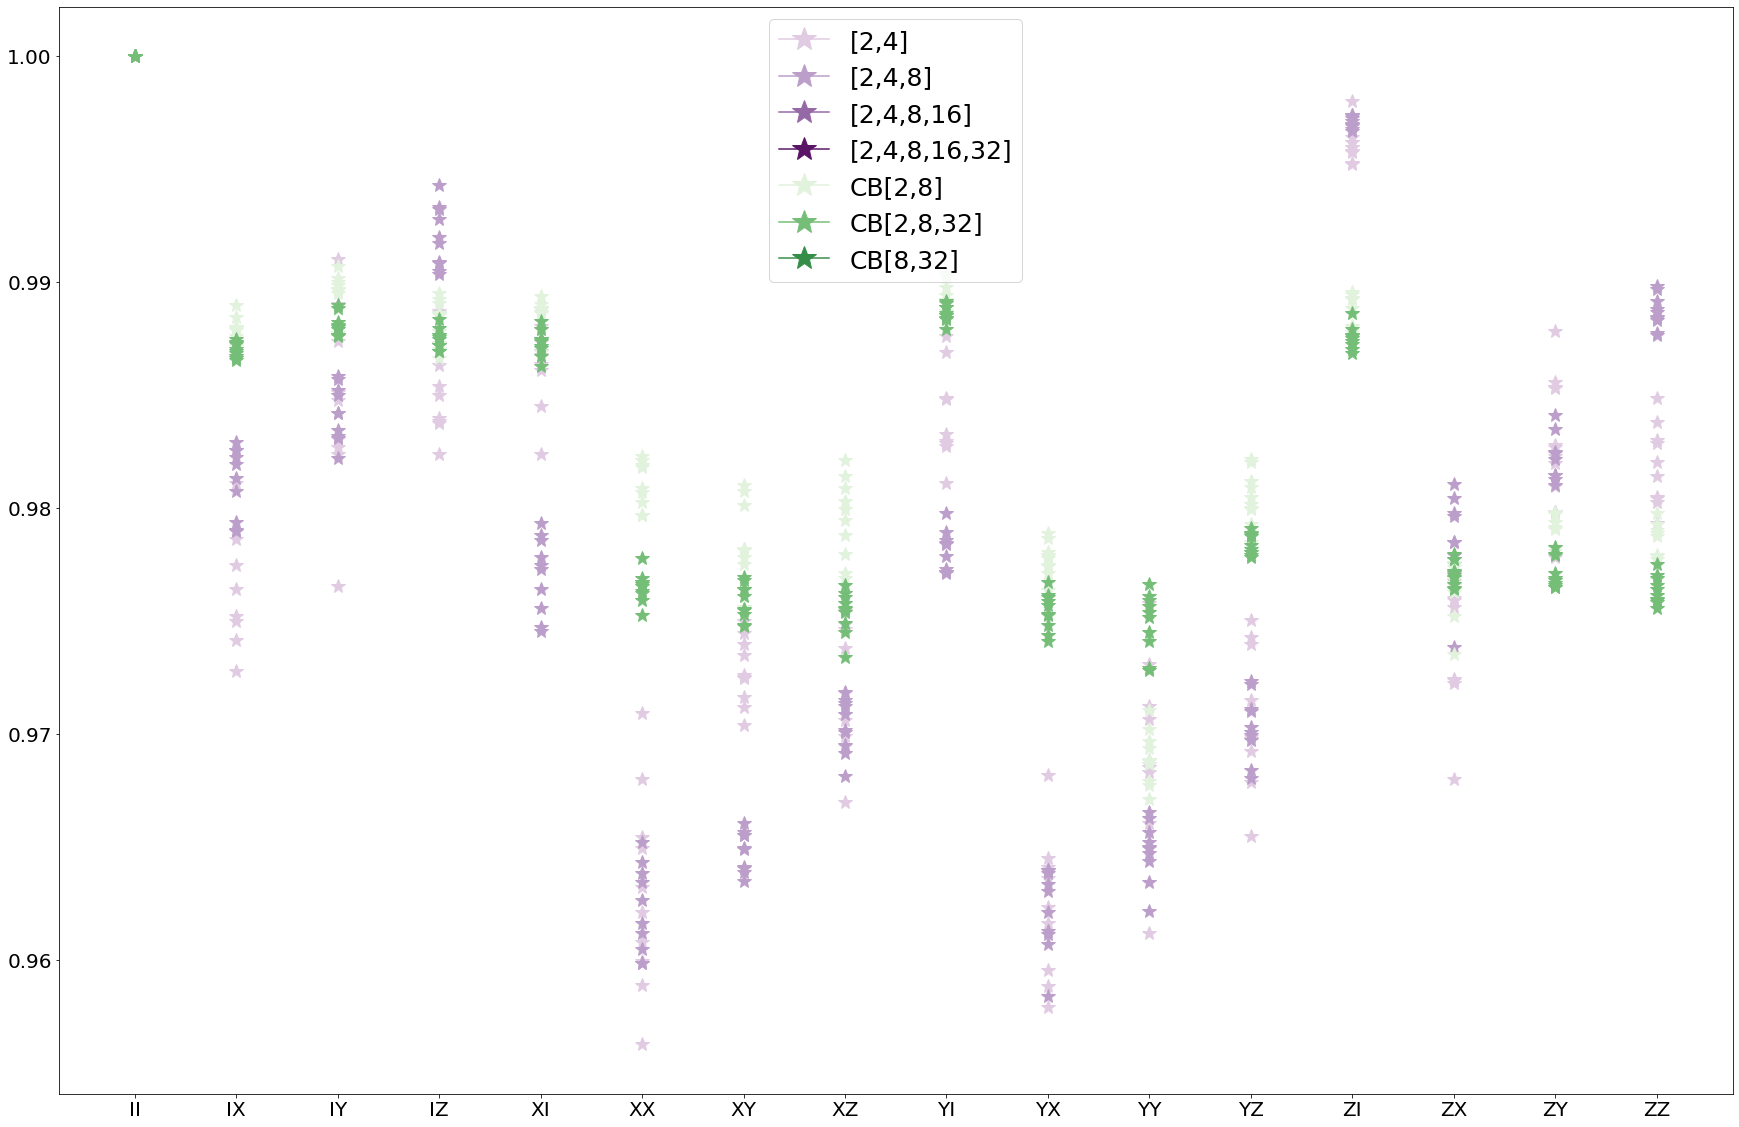

In [22]:
##plot  alpha_detail vs. depth
import seaborn as sns
pal = sns.color_palette("PRGn",20)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# fig, axs = plt.subplots(4, 4)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=30)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
plt.rcParams.update({'font.size': 20})
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],color=pal[7],marker="*",linestyle='None',markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],color=pal[5],marker="*",linestyle='None',markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

# plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],color=pal[3],marker="*",linestyle='None',markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],color=pal[0],marker="*",linestyle='None',markersize=15,label='depth 5')
plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d28[pauli_label]) for pauli_label in pauli_request_list],color=pal[11],marker="*",linestyle='None',markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],color=pal[15],marker="*",linestyle='None',markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

# plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d832[pauli_label]) for pauli_label in pauli_request_list],color=pal[18],marker="*",linestyle='None',markersize=15,label='depth 4')

# legend_elements = [Line2D([0], [0], marker='*', color=pal[7], label='[2,4]',markerfacecolor=pal[7], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[5], label='[2,4,8]',markerfacecolor=pal[5], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[3], label='[2,4,8,16]',markerfacecolor=pal[3], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[0], label='[2,4,8,16,32]',markerfacecolor=pal[0], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[11], label='CB[2,8]',markerfacecolor=pal[11], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[15], label='CB[2,8,32]',markerfacecolor=pal[15], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[17], label='CB[8,32]',markerfacecolor=pal[17], markersize=25),
                  
                  ]


plt.legend(handles=legend_elements, loc='upper center',fontsize=25)
# plt.leg

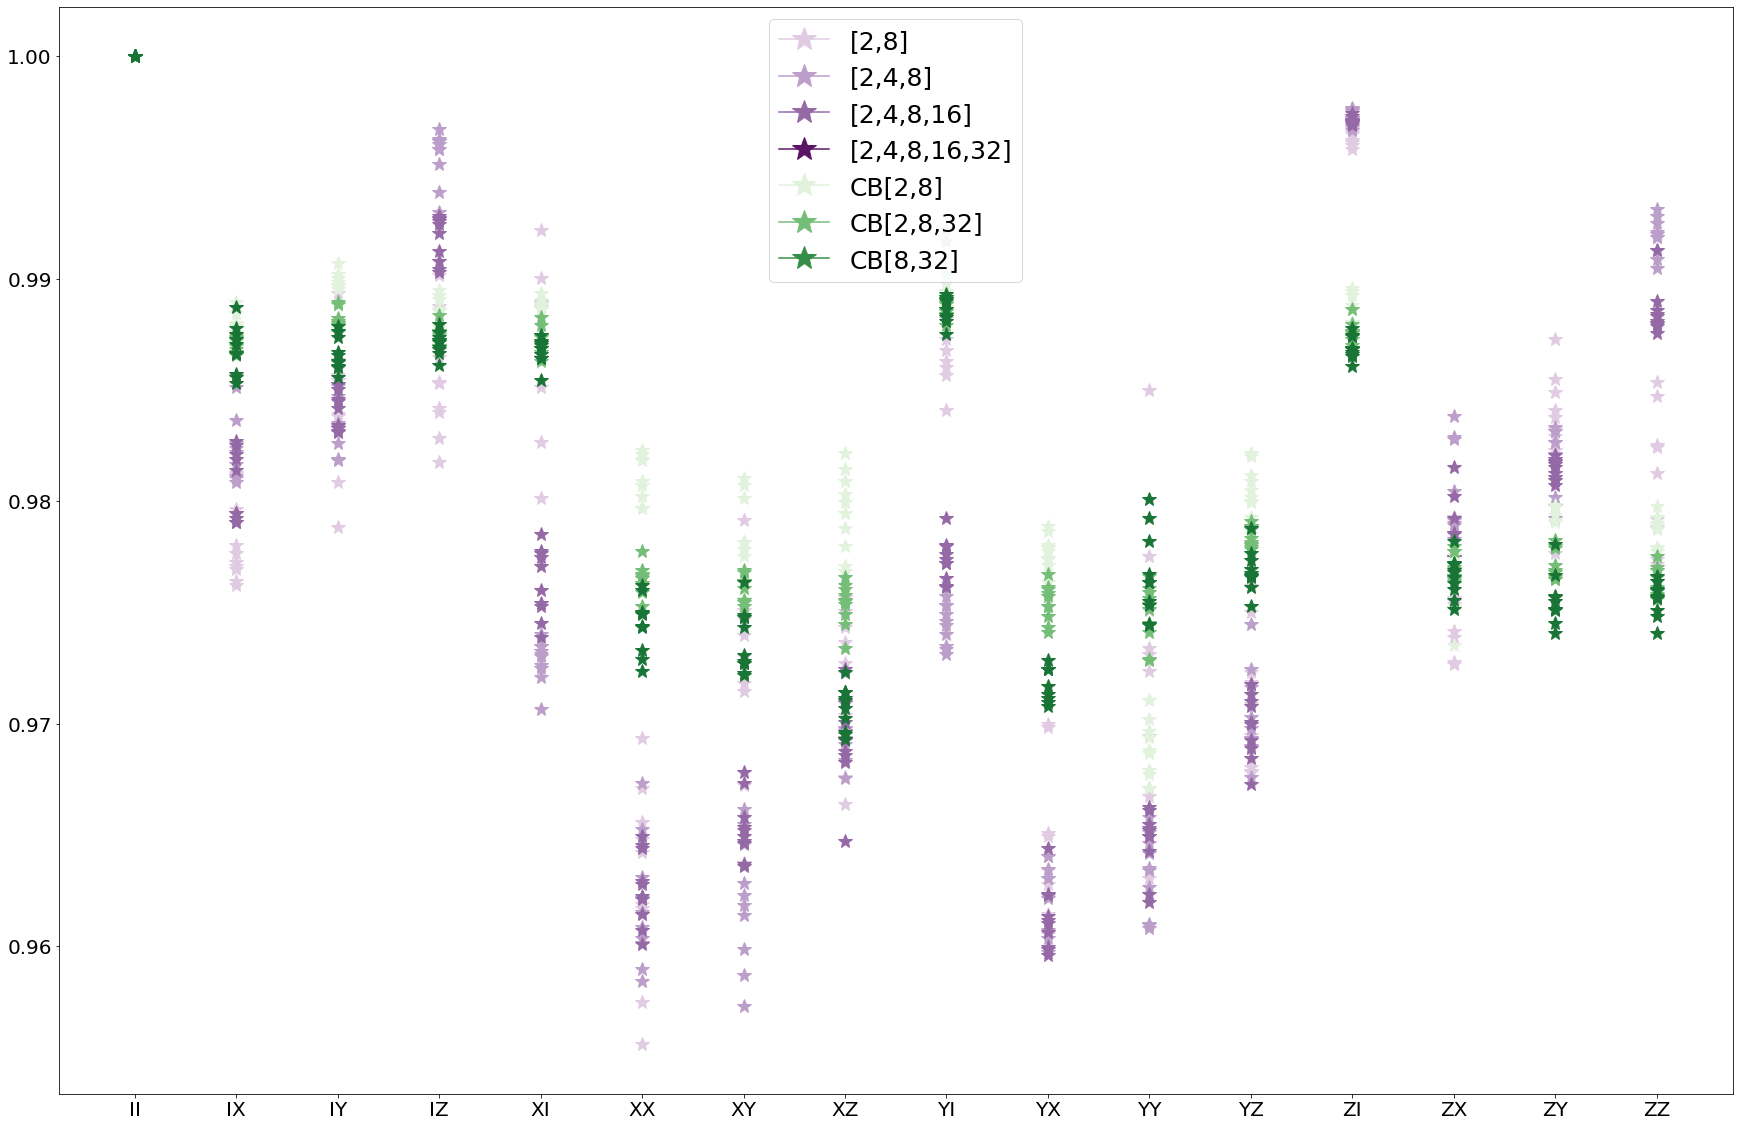

In [16]:
##plot  alpha_detail vs. depth
import seaborn as sns
pal = sns.color_palette("PRGn",20)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# fig, axs = plt.subplots(4, 4)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=30)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
plt.rcParams.update({'font.size': 20})
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],color=pal[7],marker="*",linestyle='None',markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],color=pal[5],marker="*",linestyle='None',markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],color=pal[3],marker="*",linestyle='None',markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],color=pal[0],marker="*",linestyle='None',markersize=15,label='depth 5')
plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d28[pauli_label]) for pauli_label in pauli_request_list],color=pal[11],marker="*",linestyle='None',markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],color=pal[15],marker="*",linestyle='None',markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d832[pauli_label]) for pauli_label in pauli_request_list],color=pal[18],marker="*",linestyle='None',markersize=15,label='depth 4')

legend_elements = [Line2D([0], [0], marker='*', color=pal[7], label='[2,8]',markerfacecolor=pal[7], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[5], label='[2,4,8]',markerfacecolor=pal[5], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[3], label='[2,4,8,16]',markerfacecolor=pal[3], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[0], label='[2,4,8,16,32]',markerfacecolor=pal[0], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[11], label='CB[2,8]',markerfacecolor=pal[11], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[15], label='CB[2,8,32]',markerfacecolor=pal[15], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[17], label='CB[8,32]',markerfacecolor=pal[17], markersize=25),
                  
                  ]


plt.legend(handles=legend_elements, loc='upper center',fontsize=25)
# plt.leg